   Economic Participation  Educational Attainment  Health and Survival  \
0                0.160808                0.350915             0.679102   
1                0.561277                0.025351             0.999718   
2                0.183405                0.195243             0.906354   
3                0.520068                0.697016             0.901158   
4                0.633404                0.116073             0.551907   

   Political Empowerment  Overall Index  High Gender Equality      Country  
0               0.155240       0.467402                     1  Country_210  
1               0.116898       0.476050                     1   Country_94  
2               0.080234       0.855696                     0   Country_16  
3               0.063375       0.799855                     0   Country_48  
4               0.846452       0.799416                     0  Country_115  
SVM Accuracy: 0.55
SVM ROC-AUC Score: 0.51
Naive Bayes Accuracy: 0.45
Naive Bayes ROC-AUC Sco

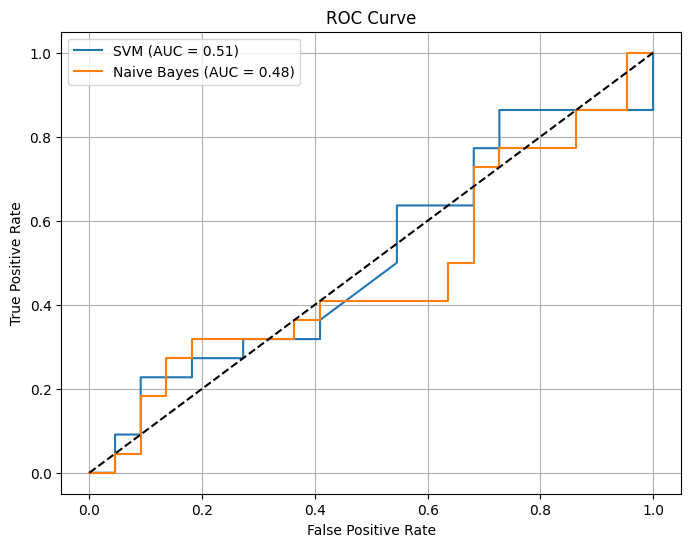

In [1]:
# Install necessary libraries (uncomment if needed)
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating a Gender Gap dataset (if you already have a dataset, load it instead)
# For real dataset, replace this with: df = pd.read_csv('your_dataset.csv')

np.random.seed(42)
countries = [f"Country_{i}" for i in range(1, 220)]
data = {
    'Economic Participation': np.random.rand(219),
    'Educational Attainment': np.random.rand(219),
    'Health and Survival': np.random.rand(219),
    'Political Empowerment': np.random.rand(219),
    'Overall Index': np.random.rand(219),
    'High Gender Equality': np.random.choice([0, 1], size=219)  # Target: 1=High equality, 0=Low
}

df = pd.DataFrame(data)
df['Country'] = countries
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle

# Display first few rows
print(df.head())

# Features and target
X = df[['Economic Participation', 'Educational Attainment', 'Health and Survival', 'Political Empowerment', 'Overall Index']]
y = df['High Gender Equality']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- Support Vector Machine (SVM) ---------
svm_model = SVC(probability=True, kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Metrics for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_svm_proba)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM ROC-AUC Score: {svm_roc_auc:.2f}")

# --------- Naive Bayes ---------
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_nb_proba = nb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_roc_auc = roc_auc_score(y_test, y_pred_nb_proba)

print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"Naive Bayes ROC-AUC Score: {nb_roc_auc:.2f}")

# --------- Plot ROC Curve ---------
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {svm_roc_auc:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {nb_roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()